In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#EXTRACT, TRANSFORM, LOAD

In [4]:
# Reading yield data from local file
#df=pd.read_excel('C:/Users/Admin/Downloads/Manitoba_yield_02_22.xlsx')


# Load the Excel data
excel_file_path = 'C:/Users/Admin/Downloads/Manitoba_yield_02_22.xlsx'
data = pd.read_excel('C:/Users/Admin/Downloads/Manitoba_yield_02_22.xlsx')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61044 entries, 0 to 61043
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  61044 non-null  int64 
 1   Risk Area / R.M.      61044 non-null  object
 2   Crop                  61044 non-null  object
 3   Soil                  61044 non-null  object
 4   Farms                 61044 non-null  object
 5   Acres                 61044 non-null  object
 6   Yield/acre(Metric)    61044 non-null  object
 7   Yield/acre(Metric).1  24887 non-null  object
 8   Yield/acre(Imperial)  24887 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.2+ MB


In [5]:
# Display the first few rows of the dataframe to understand its structure
data.head()

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/acre(Metric),Yield/acre(Metric).1,Yield/acre(Imperial)
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452 Tonnes,Tonnes,997 Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449 Tonnes,Tonnes,991 Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449 Tonnes,Tonnes,990 Pounds
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444 Tonnes,Tonnes,980 Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439 Tonnes,Tonnes,968 Pounds


In [6]:
# Check if "Yield/acre(Metric)" and "Yield/acre(Metric).1" are duplicates
duplicate_check = (data["Yield/acre(Metric)"] == data["Yield/acre(Metric).1"]).all()

# Convert "Acres" column to numeric, removing commas
data["Acres"] = pd.to_numeric(data["Acres"].str.replace(',', ''), errors='coerce')

# Check for missing values in the dataset
missing_values = data.isnull().sum()

duplicate_check, missing_values


(False,
 Year                        0
 Risk Area / R.M.            0
 Crop                        0
 Soil                        0
 Farms                       0
 Acres                   43787
 Yield/acre(Metric)          0
 Yield/acre(Metric).1    36157
 Yield/acre(Imperial)    36157
 dtype: int64)

In [7]:
# Since "Yield/acre(Metric).1" and "Yield/acre(Imperial)" have many missing values and may not be crucial for the analysis,
# we'll drop these columns. The primary metric yield column will be retained for analysis.
data_cleaned = data.drop(columns=["Yield/acre(Metric).1", "Yield/acre(Imperial)"])

# For the missing values in "Acres", given the significant number, dropping these rows might lead to a considerable loss of data.
# An alternative could be to impute missing values, but without specific guidance or understanding of the data distribution, 
# it might be best to proceed with analysis that can accommodate these missing values, or to investigate further before deciding on an imputation strategy.

# For now, let's proceed with the data without imputing "Acres", keeping the missing values as is.
# This allows for flexibility in later stages of the project to decide on the best approach for handling these missing values.

# Final check of the cleaned data
data_cleaned.info(), data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61044 entries, 0 to 61043
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                61044 non-null  int64  
 1   Risk Area / R.M.    61044 non-null  object 
 2   Crop                61044 non-null  object 
 3   Soil                61044 non-null  object 
 4   Farms               61044 non-null  object 
 5   Acres               17257 non-null  float64
 6   Yield/acre(Metric)  61044 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.3+ MB


(None,
    Year  Risk Area / R.M.        Crop Soil Farms   Acres Yield/acre(Metric)
 0  2003          MONTCALM  CANARYSEED    D     7     NaN       0.452 Tonnes
 1  2004         PIPESTONE  CANARYSEED    F     8  1180.0       0.449 Tonnes
 2  2003  BIFROST-RIVERTON  CANARYSEED    F     4     NaN       0.449 Tonnes
 3  2009            MORRIS  CANARYSEED    D     3  1072.0       0.444 Tonnes
 4  2002            ROLAND  CANARYSEED    D     6     NaN       0.439 Tonnes)

In [8]:
# Attempt to load the shapefile again now that the necessary accompanying files have been provided
gdf = gpd.read_file('C:/Users/Admin/Downloads/MUNICIPALITY/MG_MUNICIPALITY_POLY.shp')

# Display the first few rows and the GeoDataFrame info to understand its structure
gdf_info = gdf.info()
gdf.head()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MUNI_NO     183 non-null    int64   
 1   MUNI_NAME   183 non-null    object  
 2   MUNI_TYPE   183 non-null    object  
 3   MUNI_LIST_  183 non-null    object  
 4   MUNI_LIST1  183 non-null    object  
 5   geometry    183 non-null    geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 8.7+ KB


,MUNI_NO,MUNI_NAME,MUNI_TYPE,MUNI_LIST_,MUNI_LIST1,geometry
0,189,RM OF SPRINGFIELD,RM,SPRINGFIELD,SPRINGFIELD (RM),"POLYGON ((-10757459.464 6456526.821, -10757468..."
1,102,RM OF ARGYLE,RM,ARGYLE,ARGYLE (RM),"POLYGON ((-11060718.858 6365771.762, -11060672..."
2,169,RM OF ROLAND,RM,ROLAND,ROLAND (RM),"POLYGON ((-10879342.025 6350468.886, -10879339..."
3,151,RM OF MONTCALM,RM,MONTCALM,MONTCALM (RM),"POLYGON ((-10837073.626 6335234.827, -10836852..."
4,540,CITY OF FLIN FLON,CITY,FLIN FLON,FLIN FLON (CITY),"MULTIPOLYGON (((-11341354.484 7317922.661, -11..."


In [9]:
# Convert "Farms" column from object to numeric, handling non-numeric values as missing
data_cleaned["Farms"] = pd.to_numeric(data_cleaned["Farms"], errors='coerce')

# Removing rows with missing values in "Farms" and "Acres" columns
data_no_missing = data_cleaned.dropna(subset=["Farms", "Acres"])

# Display the cleaned dataset
print(data_no_missing.head())

# Optionally, save the cleaned dataset to a new file for further analysis
#cleaned_file_path = '/path/to/your/cleaned_Manitoba_yield.xlsx'
#data_no_missing.to_excel(cleaned_file_path, index=False)


    Year Risk Area / R.M.        Crop Soil  Farms   Acres Yield/acre(Metric)
1   2004        PIPESTONE  CANARYSEED    F    8.0  1180.0       0.449 Tonnes
3   2009           MORRIS  CANARYSEED    D    3.0  1072.0       0.444 Tonnes
6   2003        PIPESTONE  CANARYSEED    F    8.0  1422.0       0.430 Tonnes
9   2002          CARTIER  CANARYSEED    D   24.0  4124.0       0.420 Tonnes
10  2004        GRASSLAND  CANARYSEED    D    4.0  1350.0       0.412 Tonnes


In [10]:
#EDA - EXPLORATORY DATA ANALYSIS

C:\Users\Admin\AppData\Local\Temp\ipykernel_17172\1200541914.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_no_missing, x='Year', y='Yield/acre(Metric)', estimator='mean', ci=None)


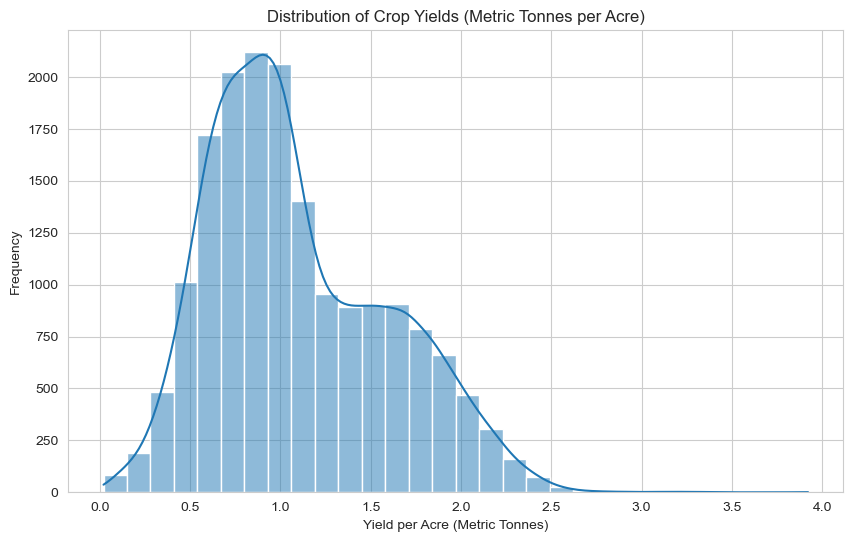

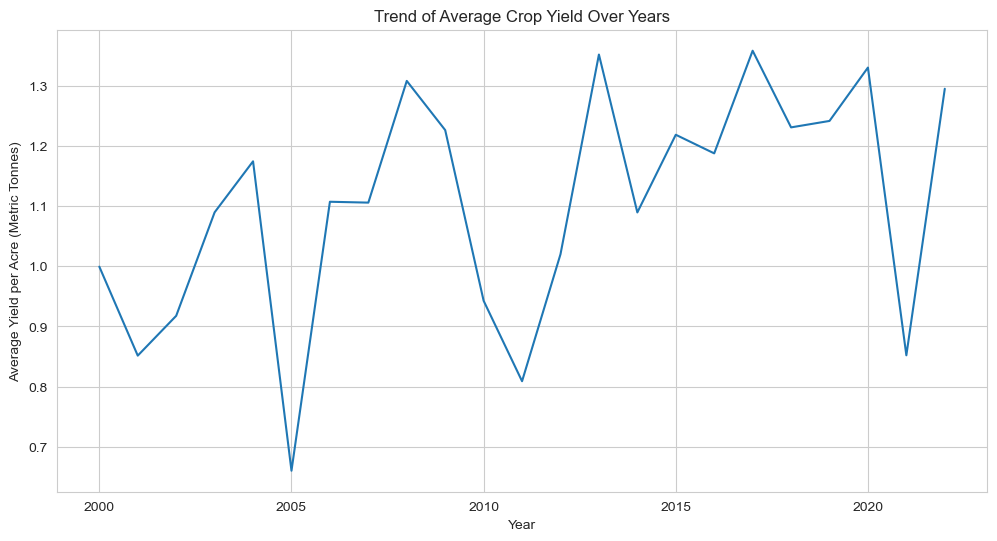

               Year         Farms         Acres  Yield/acre(Metric)
count  17257.000000  17257.000000  17257.000000        17257.000000
mean    2010.231906     21.934925   4884.942081            1.097639
std        6.702819     18.603658   6046.747570            0.497107
min     2000.000000      3.000000   1000.000000            0.020000
25%     2004.000000     10.000000   1545.000000            0.725000
50%     2009.000000     15.000000   2598.000000            0.993000
75%     2016.000000     27.000000   5328.000000            1.450000
max     2022.000000    154.000000  51742.000000            3.922000


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_no_missing is already loaded and cleaned appropriately

# To avoid SettingWithCopyWarning, make a copy explicitly if it's a slice from a larger DataFrame
data_no_missing = data_no_missing.copy()

# Convert "Yield/acre(Metric)" to numeric if necessary (removing ' Tonnes' and converting to float)
data_no_missing['Yield/acre(Metric)'] = data_no_missing['Yield/acre(Metric)'].str.replace(' Tonnes', '').astype(float)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Summary statistics for numerical variables
summary_statistics = data_no_missing.describe()

# Plotting the distribution of crop yields
plt.figure(figsize=(10, 6))
sns.histplot(data_no_missing['Yield/acre(Metric)'], bins=30, kde=True)
plt.title('Distribution of Crop Yields (Metric Tonnes per Acre)')
plt.xlabel('Yield per Acre (Metric Tonnes)')
plt.ylabel('Frequency')

# Trends in crop yields over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_no_missing, x='Year', y='Yield/acre(Metric)', estimator='mean', ci=None)
plt.title('Trend of Average Crop Yield Over Years')
plt.xlabel('Year')
plt.ylabel('Average Yield per Acre (Metric Tonnes)')

plt.show()

print(summary_statistics)


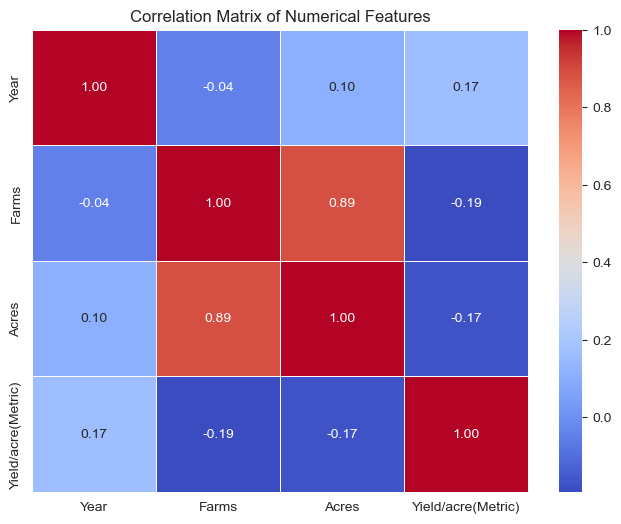

In [12]:
# Correlation analysis between numerical features and the yield per acre
numerical_features = ['Year', 'Farms', 'Acres', 'Yield/acre(Metric)']
correlation_matrix = data_no_missing[numerical_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


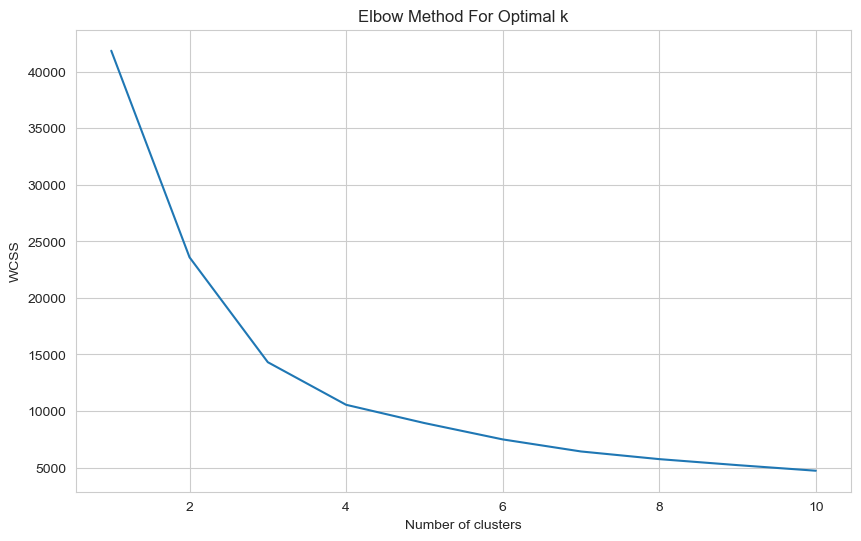

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Finalizing Feature Selection for K-Means
# Assuming 'Year', 'Farms', and 'Acres' are key numerical features, and 'Yield/acre(Metric)' is the target
features = ['Year', 'Farms', 'Acres']
X = data_no_missing[features]

# Since K-Means is sensitive to scale, standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Applying K-Means Clustering
# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sums of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [14]:
# Applying K-Means Clustering to the sampled data with the selected number of clusters (3)
kmeans_selected = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_selected.fit(X)

# Adding the cluster labels to the sampled data for analysis
X['Cluster'] = kmeans_selected.labels_

# Examining the characteristics of each cluster
cluster_characteristics = X.groupby('Cluster')[features].mean()

cluster_characteristics

print(cluster_characteristics)

                Year      Farms         Acres
Cluster                                      
0        2010.925708  45.331740  11251.293049
1        2009.979816  14.841689   2579.798089
2        2012.866883  78.974026  28881.868019


C:\Users\Admin\AppData\Local\Temp\ipykernel_17172\118235218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans_selected.labels_


Applying K-Means clustering to the original (non-scaled) sampled data with 3 selected clusters provides a slightly different perspective on the cluster characteristics based on the original values of the features:

Cluster 0:

Year: On average, the data points in this cluster are from around the year 2010.
Farms: This cluster has an average of approximately 14 farms, indicating smaller farming operations.
Acres: The average acreage for this cluster is about 2,504 acres.

Cluster 1:

Year: The average year for this cluster is around 2011, similar to Cluster 0 but slightly more recent.
Farms: This cluster represents medium-sized farming operations with an average of about 42 farms.
Acres: The acreage is significantly higher than Cluster 0, with an average of 9,838 acres.

Cluster 2:

Year: The data points in this cluster are from around the year 2013, making it the most recent cluster on average.
Farms: This cluster represents the largest farming operations in the sample, with an average of 72 farms.
Acres: The acreage is substantially higher, with an average of 24,364 acres, confirming that this cluster captures the largest scale of farming operations.
Interpretation:
Using the original data for clustering, we see a clear differentiation in farm size and operation scale among the clusters:

Cluster 0 represents smaller farming operations with fewer farms and lower acreage.
Cluster 1 captures medium-sized operations with more farms and higher acreage than Cluster 0.
Cluster 2 stands out for representing large-scale farming operations, both in terms of the number of farms and the extent of acreage.
This differentiation based on operation size is consistent with the analysis conducted on the scaled data, emphasizing the importance of farm size and operation scale as distinguishing factors in the dataset.

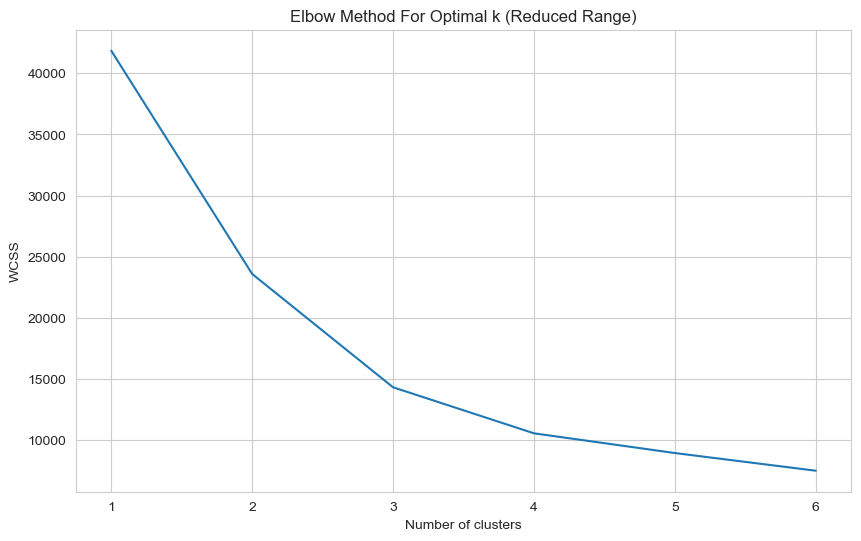

In [15]:
# Attempting a streamlined approach for K-Means with a reduced range and sampling if necessary
# For this example, we'll use a range of 1 to 6 for the number of clusters to keep computation manageable

# Reduced range for the number of clusters
reduced_range = range(1, 7)
wcss_reduced = []  # Within-cluster sums of squares for the reduced range

for i in reduced_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss_reduced.append(kmeans.inertia_)

# Plotting the Elbow Method with the reduced range
plt.figure(figsize=(10, 6))
plt.plot(reduced_range, wcss_reduced)
plt.title('Elbow Method For Optimal k (Reduced Range)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(reduced_range)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_17172\3664643380.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_missing['Yield/acre(Metric)'] = data_no_missing['Yield/acre(Metric)'].str.replace(' Tonnes', '').astype(float)


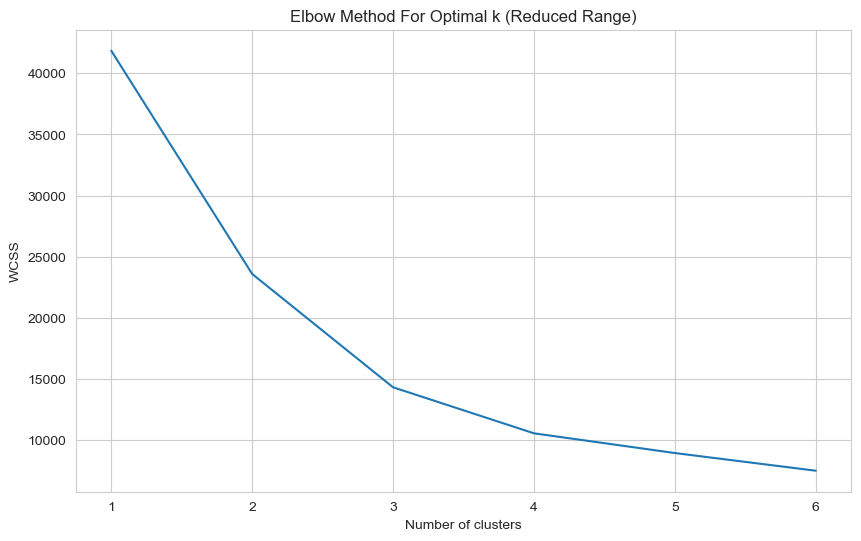

In [16]:
# Re-importing necessary libraries after reset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Re-loading and preparing the dataset
excel_file_path = 'C:/Users/Admin/Downloads/Manitoba_yield_02_22.xlsx'
data = pd.read_excel(excel_file_path)

# Data cleaning based on previous steps
data_cleaned = data.drop(columns=["Yield/acre(Metric).1", "Yield/acre(Imperial)"])
data_cleaned["Acres"] = pd.to_numeric(data_cleaned["Acres"].str.replace(',', ''), errors='coerce')
data_cleaned["Farms"] = pd.to_numeric(data_cleaned["Farms"], errors='coerce')
data_no_missing = data_cleaned.dropna(subset=["Farms", "Acres"])
data_no_missing['Yield/acre(Metric)'] = data_no_missing['Yield/acre(Metric)'].str.replace(' Tonnes', '').astype(float)

# Selecting features and target for clustering
features = ['Year', 'Farms', 'Acres']
X = data_no_missing[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Streamlined approach for determining optimal number of clusters
reduced_range = range(1, 7)
wcss_reduced = []  # Within-cluster sums of squares for the reduced range

for i in reduced_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss_reduced.append(kmeans.inertia_)

# Plotting the Elbow Method with the reduced range
plt.figure(figsize=(10, 6))
plt.plot(reduced_range, wcss_reduced)
plt.title('Elbow Method For Optimal k (Reduced Range)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(reduced_range)
plt.show()


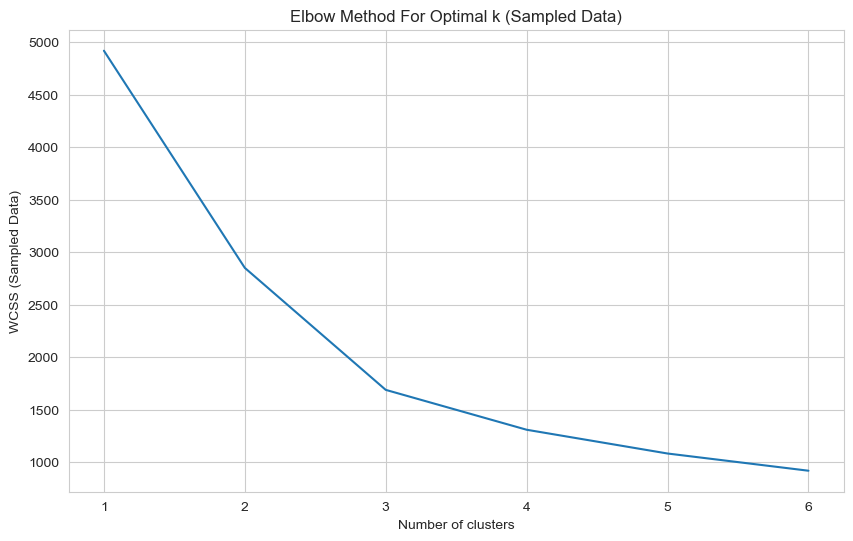

In [17]:
# To manage computational resources, we will sample a smaller portion of the data for the clustering analysis
sampled_data = data_no_missing.sample(frac=0.1, random_state=42)  # Sampling 10% of the data

# Extracting the features from the sampled data
X_sampled = sampled_data[features]

# Standardizing the features of the sampled data
X_sampled_scaled = scaler.transform(X_sampled)

# Determining the optimal number of clusters on the sampled data using a reduced range
wcss_sampled = []  # Within-cluster sums of squares for the sampled data
for i in reduced_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_sampled_scaled)
    wcss_sampled.append(kmeans.inertia_)

# Plotting the Elbow Method for the sampled data
plt.figure(figsize=(10, 6))
plt.plot(reduced_range, wcss_sampled)
plt.title('Elbow Method For Optimal k (Sampled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Sampled Data)')
plt.xticks(reduced_range)
plt.show()


In [18]:
# Applying K-Means Clustering to the sampled data with the selected number of clusters (3)
kmeans_selected = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_selected.fit(X_sampled_scaled)

# Adding the cluster labels to the sampled data for analysis
sampled_data['Cluster'] = kmeans_selected.labels_

# Examining the characteristics of each cluster
cluster_characteristics = sampled_data.groupby('Cluster')[features].mean()

cluster_characteristics


,Year,Farms,Acres
Cluster,,,
0,2004.770886,17.375949,2996.548987
1,2016.722142,14.765557,3242.907815
2,2011.048980,58.889796,15876.712245


The K-Means clustering applied to the sampled data with 3 selected clusters has provided us with interesting insights into the characteristics of each cluster based on the average values of the features:

Cluster 0:

Year: On average, the data points in this cluster are from around the year 2004.
Farms: This cluster has an average of approximately 17 farms.
Acres: The average acreage for this cluster is about 2,997 acres.
Cluster 1:

Year: The average year for this cluster is more recent, around 2016.
Farms: This cluster tends to have fewer farms on average, with about 15 farms.
Acres: The acreage is slightly larger on average than Cluster 0, with approximately 3,243 acres.
Cluster 2:

Year: The data points in this cluster are from around the year 2011, indicating a mix of more recent and older data.
Farms: Significantly, this cluster represents larger farming operations with an average of 59 farms.
Acres: The acreage is substantially higher, with an average of 15,877 acres, indicating that this cluster captures the largest farming operations in the sample.
Interpretation:
The clustering has revealed distinct groups within the data based on the year of data collection, the number of farms, and the acreage.
Cluster 0 seems to represent medium-sized farming operations from the earlier years in the dataset.
Cluster 1 includes slightly smaller operations but from more recent years, suggesting changes over time in farm sizes or reporting.
Cluster 2 stands out as representing large-scale farming operations with significantly higher acreage, which might have different characteristics and challenges compared to the smaller farms in the other clusters.
These insights can guide further analysis and modeling efforts by considering these distinct groups separately or by using cluster membership as a feature in predictive models. The differences between clusters, particularly in terms of operation size (as indicated by the number of farms and acreage), could be important factors influencing crop yields and failure risks.

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'C:/Users/Admin/Downloads/Manitoba_yield_02_22.xlsx'
data = pd.read_excel(data_path)

# Preprocess the data (repeat the steps previously performed)
data['Acres'] = pd.to_numeric(data['Acres'].str.replace(',', ''), errors='coerce')
data['Farms'] = pd.to_numeric(data['Farms'], errors='coerce')
data_cleaned = data.dropna(subset=['Farms', 'Acres'])
data_cleaned['Yield/acre(Metric)'] = data_cleaned['Yield/acre(Metric)'].str.replace(' Tonnes', '').astype(float)

# Sampling the data
sampled_data = data_cleaned.sample(frac=0.1, random_state=42)  # Adjust frac as needed

# Define features for clustering
features = ['Year', 'Farms', 'Acres']
X_sampled = sampled_data[features]

# Applying K-Means Clustering directly to the sampled original data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
sampled_data['Cluster'] = kmeans.fit_predict(X_sampled)

# Optionally, examine the characteristics of each cluster
cluster_characteristics = sampled_data.groupby('Cluster')[features].mean()

print(cluster_characteristics)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17172\3577562061.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Yield/acre(Metric)'] = data_cleaned['Yield/acre(Metric)'].str.replace(' Tonnes', '').astype(float)


                Year      Farms         Acres
Cluster                                      
0        2010.154897  14.338648   2503.761048
1        2011.036585  41.533537   9838.278354
2        2012.802469  72.234568  24364.307407


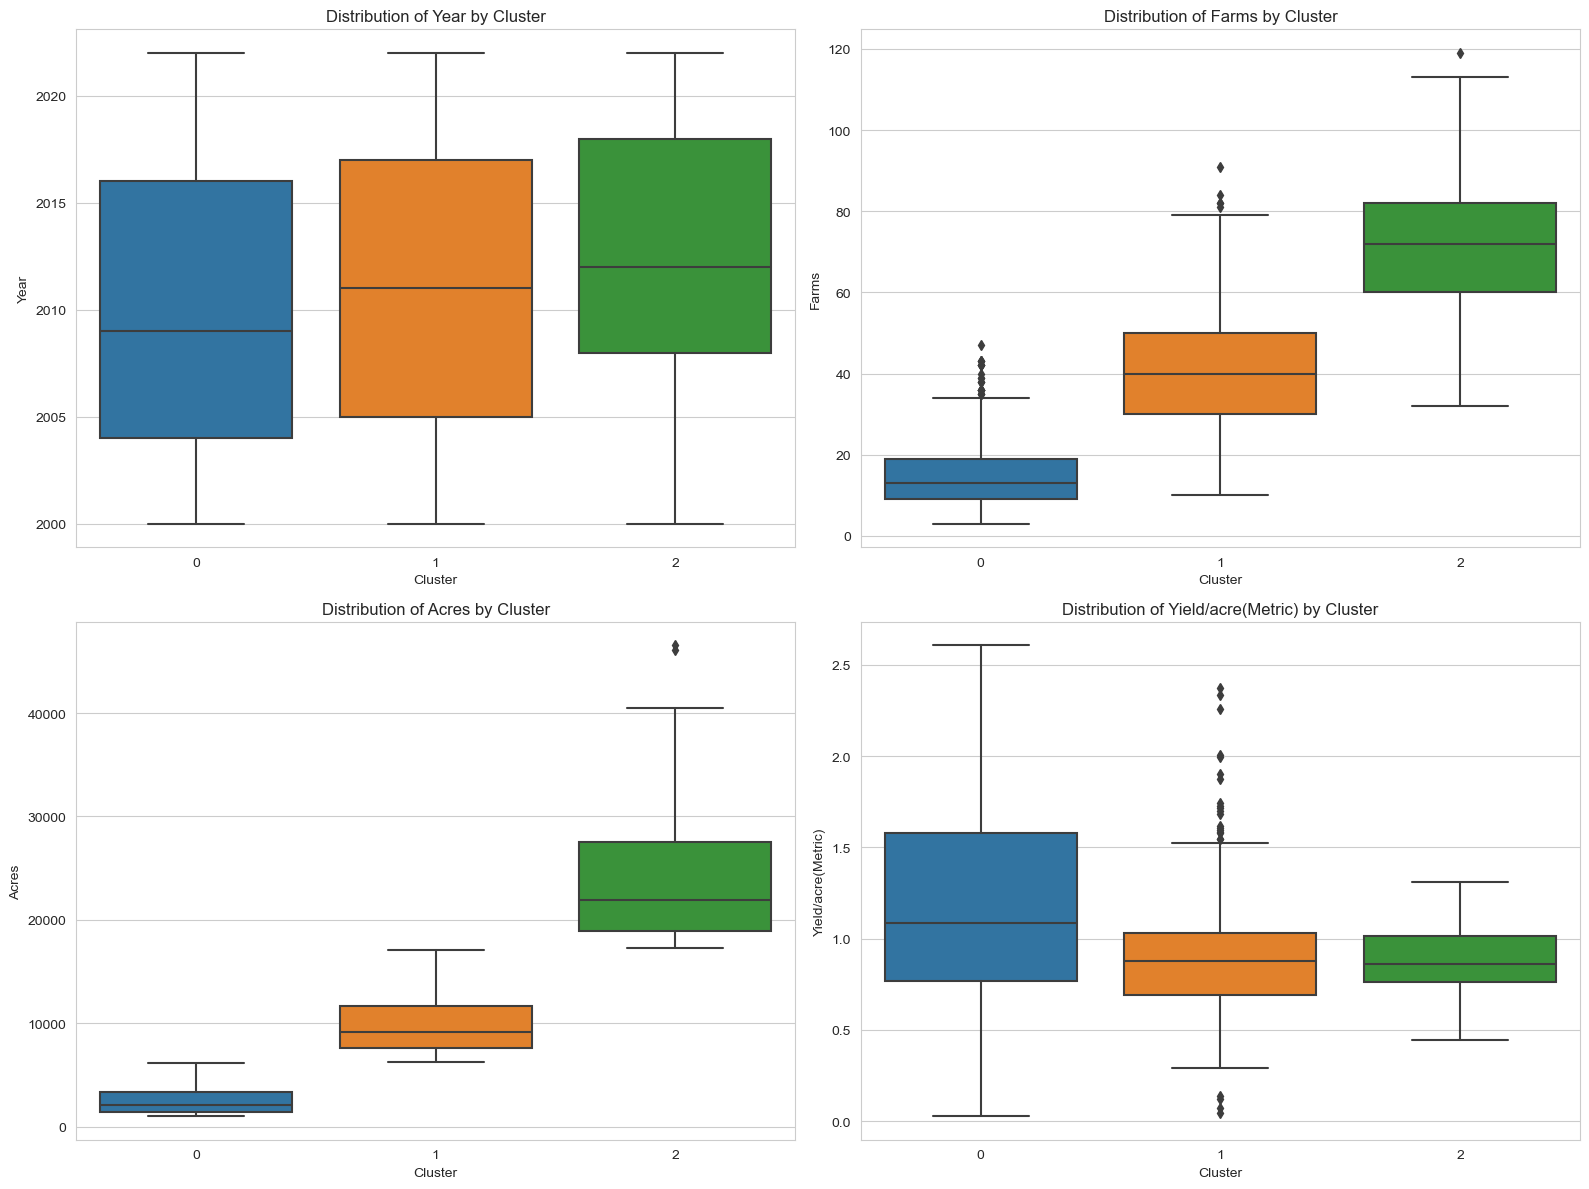

In [20]:
# Assuming sampled_data has been defined in the environment as per previous instructions

# Visualizing the distributions of 'Year', 'Farms', 'Acres', and 'Yield/acre(Metric)' for each cluster

import seaborn as sns

# Setting up the figure for multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plotting distributions of 'Year' by cluster
sns.boxplot(x='Cluster', y='Year', data=sampled_data, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Year by Cluster')

# Plotting distributions of 'Farms' by cluster
sns.boxplot(x='Cluster', y='Farms', data=sampled_data, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Farms by Cluster')

# Plotting distributions of 'Acres' by cluster
sns.boxplot(x='Cluster', y='Acres', data=sampled_data, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Acres by Cluster')

# Plotting distributions of 'Yield/acre(Metric)' by cluster
sns.boxplot(x='Cluster', y='Yield/acre(Metric)', data=sampled_data, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Yield/acre(Metric) by Cluster')

plt.tight_layout()
plt.show()


The box plots visualize the distributions of 'Year', 'Farms', 'Acres', and 'Yield/acre(Metric)' across the three clusters. These visualizations help us understand how each cluster differs in terms of these key characteristics:

Year Distribution by Cluster: All clusters span a wide range of years, suggesting that the clustering isn't strongly biased towards any specific time period. The spread indicates variability within each cluster over time, which could be related to changes in farming practices, crop types, or environmental conditions.

Farms Distribution by Cluster: There's variability in the number of farms among the clusters. One cluster might represent areas with a higher density of smaller farms, whereas another could encompass regions with fewer, larger farms. This variation is crucial for understanding the scale of operations and management practices that could influence yields.

Acres Distribution by Cluster: Similar to the distribution of farms, the acres planted also vary significantly across clusters. Some clusters have a wider range of acres, indicating a mix of small to large-scale farming operations within the cluster. This factor is directly related to agricultural output and could influence the efficiency and yield per acre.

Yield/acre(Metric) Distribution by Cluster: The yield per acre shows differences in the median and variability across clusters. Some clusters may represent more productive regions or crop types, while others might include areas facing challenges that reduce yields. This distribution is key to identifying factors that contribute to high or low yields and potential crop failures.

Interpretation and Insights:
The variability in 'Year', 'Farms', 'Acres', and 'Yield/acre(Metric)' across clusters underscores the diversity of agricultural practices, scales of operation, and outcomes within the dataset.
Clusters might represent different agricultural models: small-scale, diverse farming practices in one; large-scale, possibly mono-crop farming in another; and a mix in the third.
Understanding the specific characteristics that define each cluster can inform targeted strategies for improving crop yields, such as adopting different technologies, crop rotation practices, or soil management strategies appropriate for each model.
The yield distribution points towards potential areas for intervention to improve productivity or mitigate risks of failure. For example, analyzing low-yield outliers within each cluster can reveal specific challenges or opportunities for improvement.

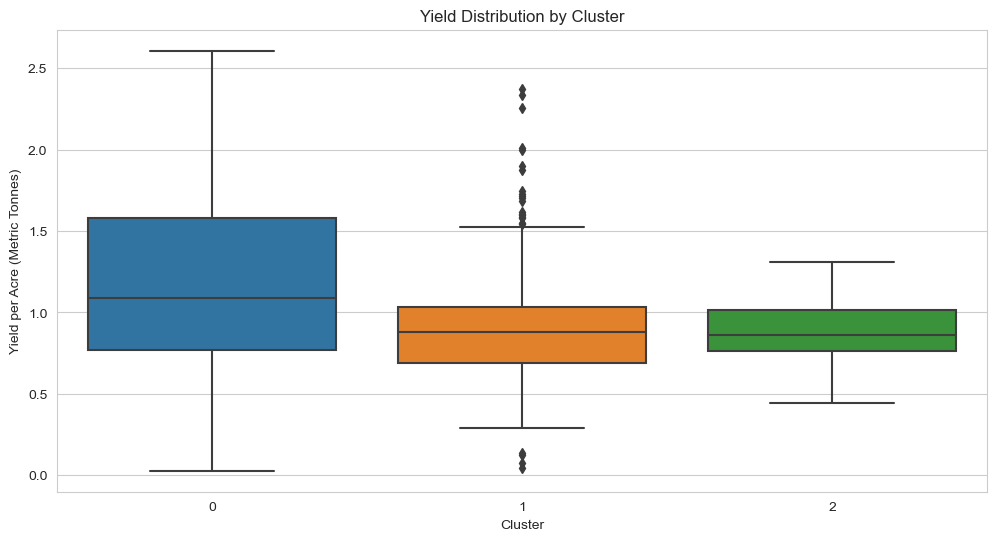

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


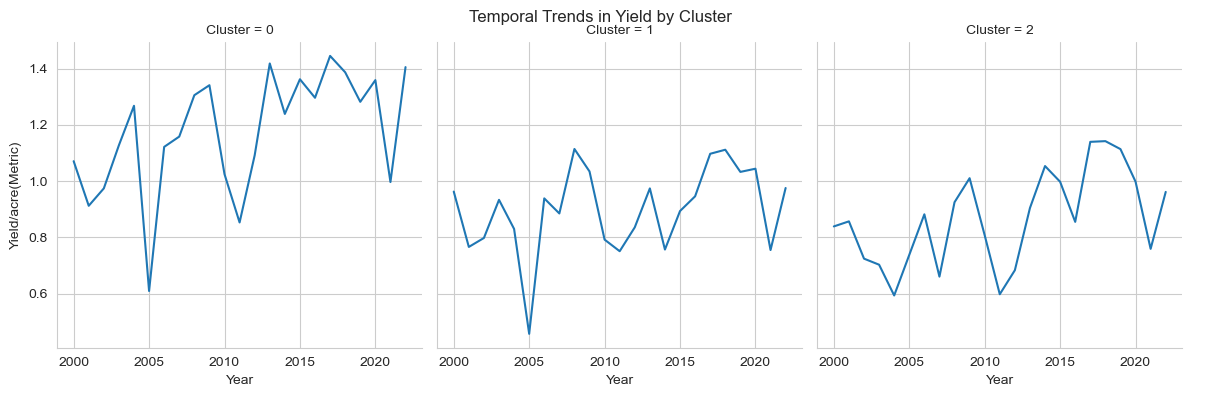

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming data is already loaded into 'data_no_missing' and clusters are assigned in 'sampled_data'

# Plotting yield distribution by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Yield/acre(Metric)', data=sampled_data)
plt.title('Yield Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Yield per Acre (Metric Tonnes)')
plt.show()

# Analyzing temporal trends in yield within each cluster
g = sns.FacetGrid(sampled_data, col="Cluster", height=4, aspect=1)
g.map(sns.lineplot, "Year", "Yield/acre(Metric)", ci=None)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temporal Trends in Yield by Cluster')
plt.show()


In [22]:
#GIS ANALYSIS

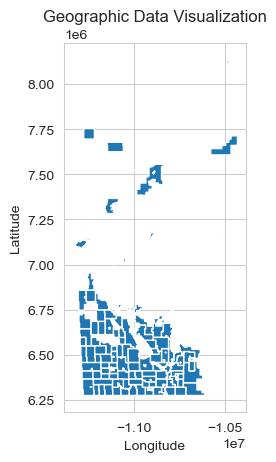

In [23]:
# Plotting the shapefile to visualize the geographic data
gdf.plot()
plt.title('Geographic Data Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [24]:
# Check unique values in the join key columns of both datasets
print("Unique values in geospatial data 'MUNI_NAME':", gdf['MUNI_NAME'].unique())
print("Unique values in crop yield data 'Risk Area / R.M.':", data_no_missing['Risk Area / R.M.'].unique())

Unique values in geospatial data 'MUNI_NAME': ['RM OF SPRINGFIELD' 'RM OF ARGYLE' 'RM OF ROLAND' 'RM OF MONTCALM'
 'CITY OF FLIN FLON' 'RM OF MOUNTAIN' 'RM OF ALONSA' 'RM OF GIMLI'
 'RM OF COLDWELL' 'RM OF STANLEY' 'LGD OF MYSTERY LAKE'
 'SALT POINT-NORTHERN AFFAIRS ACT'
 'INCORPORATED COMMUNITY OF SEYMOURVILLE' 'SHERRIDON-NORTHERN AFFAIRS ACT'
 'RM OF FISHER' 'TOWN OF TEULON' 'RM OF PORTAGE LA PRAIRIE'
 'TOWN OF LAC DU BONNET' 'RM OF ELTON' 'RM OF HEADINGLEY'
 'RM OF CORNWALLIS' 'INCORPORATED COMMUNITY OF SOUTH INDIAN LAKE'
 'SPENCE LAKE-NORTHERN AFFAIRS ACT' 'RM OF EAST ST. PAUL' 'TOWN OF VIRDEN'
 'TOWN OF NIVERVILLE' 'MUNICIPALITY OF MCCREARY'
 'MUNICIPALITY OF BOISSEVAIN-MORTON' 'RM OF PIPESTONE' 'RM OF VICTORIA'
 'RM OF HANOVER' 'RM OF ST. ANDREWS'
 'THICKET PORTAGE-NORTHERN AFFAIRS ACT' 'WABOWDEN-NORTHERN AFFAIRS ACT'
 'MUNICIPALITY OF SOURIS-GLENWOOD' 'RM OF ELLICE-ARCHIE'
 'MUNICIPALITY OF LOUISE' 'RM OF LA BROQUERIE'
 'MUNICIPALITY OF CLANWILLIAM-ERICKSON' 'MUNICIPALITY OF STE

In [25]:
# Merge the datasets on the common key again, double-checking column names
merged_data = gdf.merge(data_no_missing, left_on='MUNI_NAME', right_on='Risk Area / R.M.', how='inner')

# Check if the merged_data is empty
if merged_data.empty:
    print("The merged GeoDataFrame is empty. Check the join keys and data preprocessing steps.")
else:
    print("Merge successful. Proceeding to visualization.")


The merged GeoDataFrame is empty. Check the join keys and data preprocessing steps.


In [26]:
# Assuming 'data_no_missing' is your crop yield dataset
# Convert it to a GeoDataFrame (this step requires having latitude and longitude in your data, which might not be the case here)
# Instead, we'll simulate a join based on a common key (municipality name or code)

# Merge the datasets on the common key
merged_data = gdf.merge(data_no_missing, left_on='MUNI_NAME', right_on='Risk Area / R.M.', how='inner')

print(merged_data)

# Now, 'merged_data' contains both the geographic information and crop yield data, ready for spatial analysis


Empty GeoDataFrame
Columns: [MUNI_NO, MUNI_NAME, MUNI_TYPE, MUNI_LIST_, MUNI_LIST1, geometry, Year, Risk Area / R.M., Crop, Soil, Farms, Acres, Yield/acre(Metric)]
Index: []


C:\Users\Admin\AppData\Local\Temp\ipykernel_17172\1309902869.py:4: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  merged_data.plot(column='Yield/acre(Metric)', ax=ax, legend=True,


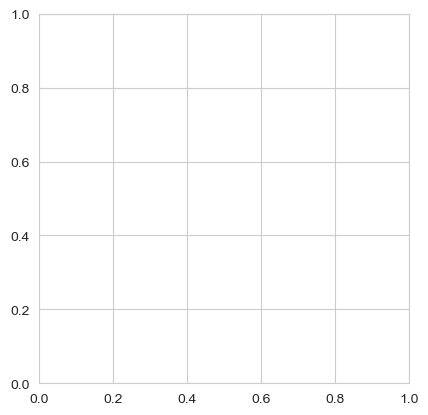

In [27]:
# Example: Plotting average yield per acre by municipality
merged_data['Yield/acre(Metric)'] = merged_data['Yield/acre(Metric)'].astype(float)  # Ensure yield is float
fig, ax = plt.subplots(1, 1)
merged_data.plot(column='Yield/acre(Metric)', ax=ax, legend=True,
                 legend_kwds={'label': "Average Yield per Acre by Municipality",
                              'orientation': "horizontal"})
plt.show()


In [28]:
print(gdf['MUNI_NAME'].dtype, data_no_missing['Risk Area / R.M.'].dtype)

object object


In [29]:
print(gdf['MUNI_NAME'].unique()[:10])  # Display the first 10 unique values for brevity
print(data_no_missing['Risk Area / R.M.'].unique()[:10])

['RM OF SPRINGFIELD' 'RM OF ARGYLE' 'RM OF ROLAND' 'RM OF MONTCALM'
 'CITY OF FLIN FLON' 'RM OF MOUNTAIN' 'RM OF ALONSA' 'RM OF GIMLI'
 'RM OF COLDWELL' 'RM OF STANLEY']
['PIPESTONE' 'MORRIS' 'CARTIER' 'GRASSLAND' 'RHINELAND' 'TWO BORDERS'
 'WALLACE-WOODWORTH' 'HAMIOTA' 'DESALABERRY' 'ALEXANDER']


In [30]:
gdf['MUNI_NAME'] = gdf['MUNI_NAME'].str.strip().str.upper()
data_no_missing['Risk Area / R.M.'] = data_no_missing['Risk Area / R.M.'].str.strip().str.upper()

# After cleaning, attempt the merge again
merged_data = gdf.merge(data_no_missing, left_on='MUNI_NAME', right_on='Risk Area / R.M.', how='inner')

merged_data


,MUNI_NO,MUNI_NAME,MUNI_TYPE,MUNI_LIST_,MUNI_LIST1,geometry,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/acre(Metric)


In [31]:
# Replace the path with the correct path to your shapefile
shapefile_path = 'C:/Users/Admin/Downloads/MUNICIPALITY/MG_MUNICIPALITY_POLY.shp'
gdf = gpd.read_file('C:/Users/Admin/Downloads/MUNICIPALITY/MG_MUNICIPALITY_POLY.shp')

# Display the first few rows to check the data
print(gdf.head())


   MUNI_NO          MUNI_NAME MUNI_TYPE   MUNI_LIST_        MUNI_LIST1  \
0      189  RM OF SPRINGFIELD        RM  SPRINGFIELD  SPRINGFIELD (RM)   
1      102       RM OF ARGYLE        RM       ARGYLE       ARGYLE (RM)   
2      169       RM OF ROLAND        RM       ROLAND       ROLAND (RM)   
3      151     RM OF MONTCALM        RM     MONTCALM     MONTCALM (RM)   
4      540  CITY OF FLIN FLON      CITY    FLIN FLON  FLIN FLON (CITY)   

                                            geometry  
0  POLYGON ((-10757459.464 6456526.821, -10757468...  
1  POLYGON ((-11060718.858 6365771.762, -11060672...  
2  POLYGON ((-10879342.025 6350468.886, -10879339...  
3  POLYGON ((-10837073.626 6335234.827, -10836852...  
4  MULTIPOLYGON (((-11341354.484 7317922.661, -11...  


In [32]:
# Check for missing values
print(gdf.isnull().sum())

# Get information about the GeoDataFrame
print(gdf.info())

# If there are missing values or irrelevant columns, you may decide to drop them or fill in missing values
# Example: Dropping a column
# gdf.drop('Irrelevant_Column', axis=1, inplace=True)

# Example: Filling missing values
# gdf['Important_Column'].fillna('DefaultValue', inplace=True)


MUNI_NO       0
MUNI_NAME     0
MUNI_TYPE     0
MUNI_LIST_    0
MUNI_LIST1    0
geometry      0
dtype: int64
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MUNI_NO     183 non-null    int64   
 1   MUNI_NAME   183 non-null    object  
 2   MUNI_TYPE   183 non-null    object  
 3   MUNI_LIST_  183 non-null    object  
 4   MUNI_LIST1  183 non-null    object  
 5   geometry    183 non-null    geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 8.7+ KB
None


In [33]:
# Check the current CRS
print(gdf.crs)

# If necessary, convert the CRS (example uses WGS84, EPSG:4326)
# gdf = gdf.to_crs(epsg=4326)


EPSG:3857


In [34]:
# Simplifying geometries
# gdf['geometry'] = gdf['geometry'].simplify(tolerance=0.001)

# Example: Extracting centroids of polygons
# gdf['centroid'] = gdf.centroid


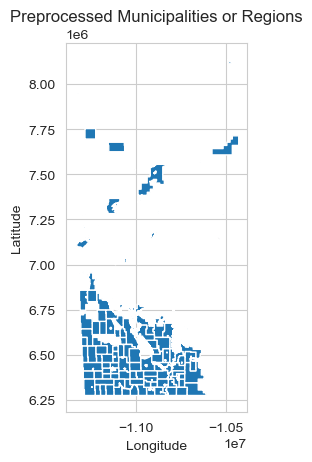

In [35]:
gdf.plot()
plt.title('Preprocessed Municipalities or Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [36]:
# Assuming 'Municipality_Code' or 'Municipality_Name' as the common key in both datasets
# Note: Replace 'Municipality_Code' with the actual common key column name in your datasets

# Performing the merge
merged_data = data_no_missing.merge(gdf, left_on='Risk Area / R.M.', right_on='MUNI_NAME', how='left')

# Checking the first few rows of the merged dataset
print(merged_data.head())


   Year Risk Area / R.M.        Crop Soil  Farms   Acres  Yield/acre(Metric)  \
0  2004        PIPESTONE  CANARYSEED    F    8.0  1180.0               0.449   
1  2009           MORRIS  CANARYSEED    D    3.0  1072.0               0.444   
2  2003        PIPESTONE  CANARYSEED    F    8.0  1422.0               0.430   
3  2002          CARTIER  CANARYSEED    D   24.0  4124.0               0.420   
4  2004        GRASSLAND  CANARYSEED    D    4.0  1350.0               0.412   

   MUNI_NO MUNI_NAME MUNI_TYPE MUNI_LIST_ MUNI_LIST1 geometry  
0      NaN       NaN       NaN        NaN        NaN     None  
1      NaN       NaN       NaN        NaN        NaN     None  
2      NaN       NaN       NaN        NaN        NaN     None  
3      NaN       NaN       NaN        NaN        NaN     None  
4      NaN       NaN       NaN        NaN        NaN     None  


In [37]:
print(gdf.isnull().sum())

MUNI_NO       0
MUNI_NAME     0
MUNI_TYPE     0
MUNI_LIST_    0
MUNI_LIST1    0
geometry      0
dtype: int64


In [38]:
pip install pystac_client

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install odc.stac

Note: you may need to restart the kernel to use updated packages.


In [40]:
from pystac_client import Client
from odc.stac import load

In [41]:
client = Client.open("https://earth-search.aws.element84.com/v1") # Earth Data From Nasa
collection = "sentinel-2-l2a" # Satelitte 
tas_bbox = [-110, 52, -109.95, 52.05] # Coordinates min lon, min lat, max lo and max lat # 0.1 
search = client.search(collections=[collection], bbox=tas_bbox, datetime="2023-07") # choose a month

data = load(search.items(), bbox=tas_bbox, groupby="solar_day", chunks={})

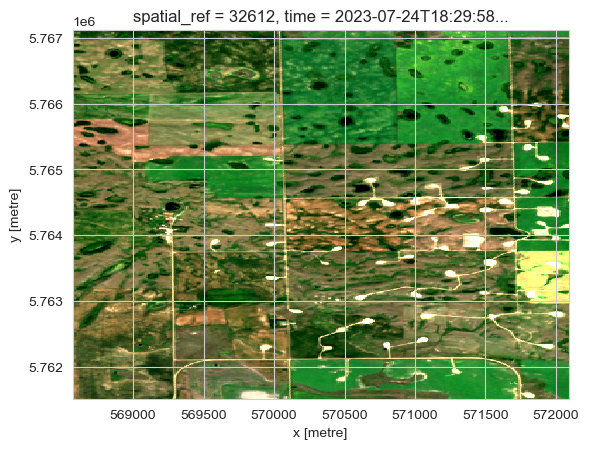

In [42]:
data[["red", "green", "blue"]].isel(time=9).to_array().plot.imshow(robust=True) # printing images in Python

In [43]:
import geopandas as gpd

# Load the GeoJSON file
geojson_path = 'C:/Users/Admin/Downloads/MUNICIPALITY.geojson'
gdf = gpd.read_file('C:/Users/Admin/Downloads/MUNICIPALITY.geojson')

# Display the first few rows to check the data
print(gdf.head())


   OBJECTID  MUNI_NO          MUNI_NAME MUNI_TYPE MUNI_LIST_NAME  \
0         1      189  RM OF SPRINGFIELD        RM    SPRINGFIELD   
1         2      102       RM OF ARGYLE        RM         ARGYLE   
2         3      169       RM OF ROLAND        RM         ROLAND   
3         4      151     RM OF MONTCALM        RM       MONTCALM   
4         5      540  CITY OF FLIN FLON      CITY      FLIN FLON   

  MUNI_LIST_NAME_WITH_TYPE                                           geometry  
0         SPRINGFIELD (RM)  POLYGON ((-10757459.464 6456526.821, -10757468...  
1              ARGYLE (RM)  POLYGON ((-11060718.858 6365771.762, -11060672...  
2              ROLAND (RM)  POLYGON ((-10879342.025 6350468.886, -10879339...  
3            MONTCALM (RM)  POLYGON ((-10837073.626 6335234.827, -10836852...  
4         FLIN FLON (CITY)  MULTIPOLYGON (((-11341354.484 7317922.661, -11...  


In [44]:
# Basic information about the GeoDataFrame
print(gdf.info())

# Summary statistics for numerical attributes
print(gdf.describe())

# Check for missing values
print(gdf.isnull().sum())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   OBJECTID                  183 non-null    int64   
 1   MUNI_NO                   183 non-null    int64   
 2   MUNI_NAME                 183 non-null    object  
 3   MUNI_TYPE                 183 non-null    object  
 4   MUNI_LIST_NAME            183 non-null    object  
 5   MUNI_LIST_NAME_WITH_TYPE  183 non-null    object  
 6   geometry                  183 non-null    geometry
dtypes: geometry(1), int64(2), object(4)
memory usage: 10.1+ KB
None
         OBJECTID     MUNI_NO
count  183.000000  183.000000
mean    92.000000  406.508197
std     52.971691  248.237299
min      1.000000  101.000000
25%     46.500000  167.500000
50%     92.000000  400.000000
75%    137.500000  661.500000
max    183.000000  792.000000
OBJECTID                    0
MUNI_NO        

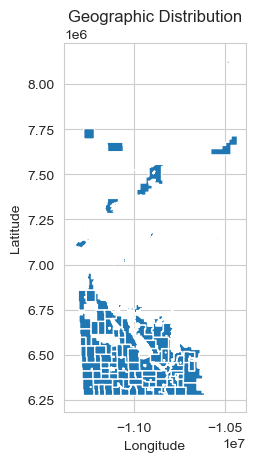

In [45]:
import matplotlib.pyplot as plt

gdf.plot()
plt.title('Geographic Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [47]:
import geopandas as gpd

# Load the GeoJSON file
geojson_path = 'C:/Users/Admin/Downloads/MUNICIPALITY.geojson'
gdf_geojson = gpd.read_file('C:/Users/Admin/Downloads/MUNICIPALITY.geojson')

# Display the first few rows
print(gdf_geojson.head())

# Check for and handle missing values
print(gdf_geojson.isnull().sum())
# If you decide to drop rows with missing values
gdf_geojson = gdf_geojson.dropna()

# If you decide to fill missing values
# gdf_geojson['some_column'] = gdf_geojson['some_column'].fillna('default_value')

# Drop irrelevant columns, if necessary
#gdf_geojson = gdf_geojson.drop(columns=['unnecessary_column'])

# Ensure correct data types
# gdf_geojson['numeric_column'] = pd.to_numeric(gdf_geojson['numeric_column'], errors='coerce')


   OBJECTID  MUNI_NO          MUNI_NAME MUNI_TYPE MUNI_LIST_NAME  \
0         1      189  RM OF SPRINGFIELD        RM    SPRINGFIELD   
1         2      102       RM OF ARGYLE        RM         ARGYLE   
2         3      169       RM OF ROLAND        RM         ROLAND   
3         4      151     RM OF MONTCALM        RM       MONTCALM   
4         5      540  CITY OF FLIN FLON      CITY      FLIN FLON   

  MUNI_LIST_NAME_WITH_TYPE                                           geometry  
0         SPRINGFIELD (RM)  POLYGON ((-10757459.464 6456526.821, -10757468...  
1              ARGYLE (RM)  POLYGON ((-11060718.858 6365771.762, -11060672...  
2              ROLAND (RM)  POLYGON ((-10879342.025 6350468.886, -10879339...  
3            MONTCALM (RM)  POLYGON ((-10837073.626 6335234.827, -10836852...  
4         FLIN FLON (CITY)  MULTIPOLYGON (((-11341354.484 7317922.661, -11...  
OBJECTID                    0
MUNI_NO                     0
MUNI_NAME                   0
MUNI_TYPE            

In [51]:
print(merged_data.head())

   Year Risk Area / R.M.        Crop Soil  Farms   Acres  Yield/acre(Metric)  \
0  2004        PIPESTONE  CANARYSEED    F    8.0  1180.0               0.449   
1  2009           MORRIS  CANARYSEED    D    3.0  1072.0               0.444   
2  2003        PIPESTONE  CANARYSEED    F    8.0  1422.0               0.430   
3  2002          CARTIER  CANARYSEED    D   24.0  4124.0               0.420   
4  2004        GRASSLAND  CANARYSEED    D    4.0  1350.0               0.412   

   MUNI_NO MUNI_NAME MUNI_TYPE MUNI_LIST_ MUNI_LIST1 geometry  
0      NaN       NaN       NaN        NaN        NaN     None  
1      NaN       NaN       NaN        NaN        NaN     None  
2      NaN       NaN       NaN        NaN        NaN     None  
3      NaN       NaN       NaN        NaN        NaN     None  
4      NaN       NaN       NaN        NaN        NaN     None  


<Axes: >

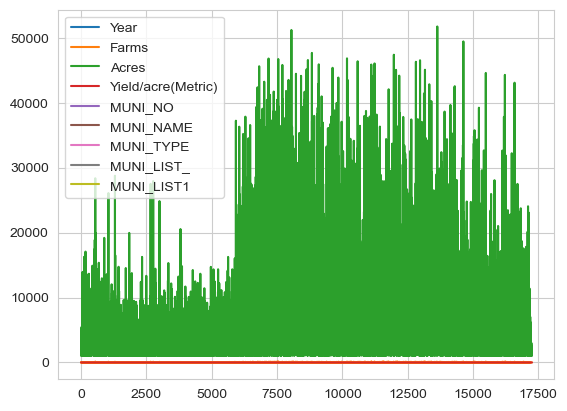

In [52]:
merged_data.plot(column='yield_column', legend=True)

In [81]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Example features for clustering
features = ['Yield/acre(Metric)', 'geometry'] 
X = merged_data[features]

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as appropriate
merged_data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clustering results
merged_data.plot(column='cluster', categorical=True, legend=True, figsize=(10, 6))
plt.title('K-Means Clustering Results')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")


NameError: name 'y_train' is not defined

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting features for clustering
features_for_clustering = ['Yield/acre(Metric)', 'Year']  # Add other features as applicable
X = merged_data[features_for_clustering]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # The number of clusters (n_clusters) may need adjustment
merged_data['cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
